# Importation des Frameworks

In [1]:
import pandas as pd # Utilisé pour la manipulation et l'analyse des données.
import networkx as nx
import random # pour la reproductibilité.def lire_fasta(fichier):
import networkx as nx  # Pour la création et l'analyse de graphes avec Node2Vec.
from Bio import SeqIO # Pour la manipulation de séquences biologiques.
import numpy as np # Pour les opérations numériques et le calcul scientifique.
import itertools # Pour les itérations.
from collections import Counter # Afin de calculer la fréquence des k-mers.
from scipy.stats import f_oneway # Pour l'ANOVA
from scipy.stats import chi2_contingency # Pour le Chi-2 d'indépendance
import matplotlib.pyplot as plt # Pour la visualisation de données.
import seaborn as sns # Egalement pour la visualisation de données.
from sklearn.metrics import pairwise_distances_argmin_min # Scikit-learn Pour l'application des algorithmes de machine learning, y compris K-means, ACP, t-SNE, ANOVA, et la régression logistique.
from sklearn.metrics import silhouette_score, precision_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score # Pour l'optimisaition des hyperparamètres.
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.utils.class_weight import compute_class_weight
from sklearn.cluster import KMeans # Pour la clusterisation
from sklearn.manifold import TSNE # Pour la réduction de dimensionnalité
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split # Pour l'implémentation de la régression logistique.
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from node2vec import Node2Vec # Pour l'implémentation de Node2Vec
from gensim.models import Word2Vec #Pour l'implémentation de Word2Vec
import joblib
import os

# Lecture des fichiers Fasta

In [2]:
# Fonction pour lire le fichier FASTA et extraire les identifiants et les séquences
def fasta_to_df(fasta_file):
    ids = []
    sequences = []
    geno='sous type 1'
    
    with open(fasta_file, 'r') as file:
        current_id = None
        current_sequence = []
        
        for line in file:
            line = line.strip()
            if line.startswith(">"):
                if current_id is not None:
                    # Sauvegarder la séquence de la précédente entrée
                    sequences.append("".join(current_sequence))
                # Mettre à jour le nouvel identifiant
                current_id = line[1:].split()[0]  # Enlever le ">" et extraire l'identifiant
                ids.append(current_id)
                current_sequence = []
            else:
                # Ajouter les lignes de séquence à la séquence en cours
                current_sequence.append(line)
        
        # Ajouter la dernière séquence
        if current_id is not None:
            sequences.append("".join(current_sequence))
    
    # Créer un DataFrame
    df = pd.DataFrame({
        'accession': ids,
        'sequence': sequences,
        'genotype' : geno
    })
    
    return df

# Spécifier le chemin du fichier FASTA .txt
chemin_1 = os.path.join(os.path.expanduser("~"), "Desktop", "Stage", "HCV", "V0_NS5B sous-type 1.txt")

# Convertir le fichier FASTA en DataFrame
df1 = fasta_to_df(chemin_1)

# Exporter le DataFrame en CSV
df1.to_csv(os.path.join(os.path.expanduser("~"), "Desktop", "Stage", "HCV", "V0_NS5B sous-type 1.txt.csv"), index=False)


In [3]:
df1

,accession,sequence,genotype
0,1aHCV1,TGTTGTGACCTCGACCCCCAAGCCCGCGTGGCCATCAAGTCCCTCA...,sous type 1
1,1aHCVH,TGTTGTGACCTGGACCCCCAAGCCCGCGTGGCCATCAAGTCCCTCA...,sous type 1
2,1bHCJ4,TGTTGTGACTTGGCCCCCGAGGCCAGACAGGCCATAAGGTCGCTCA...,sous type 1
3,1bHCVBK,TGTTGTGACTTGGCCCCCGAAGCCAGACAGGCCATAAAATCGCTCA...,sous type 1
4,1a_CNR155.13,TGTTGTGACCTGGACCCCCAAGCCCGCGTGGCCATCAAGTCCCTCA...,sous type 1
...,...,...,...
350,1a_CNR718.23,CTGCTCMATGTCYTAYTCMTGGACAGGCGCRCTCGTCACCCCRTGY...,sous type 1
351,1a_CNR588.20,CTCAATGTCTTATTCCTGGACAGGCGCACTCGTCACCCCGTGCGCT...,sous type 1
352,1b_CNR630.21,TGCTCRATGTCCTAYACRTGGACAGGCGCSCTGATCACGCCRTGCG...,sous type 1
353,1b_CNR522.23,TCTGCTGCTCRATGTCCTACACRTGGACGGGCGCCCTGATYACGCC...,sous type 1


In [4]:
# Fonction pour lire le fichier FASTA et extraire les identifiants et les séquences
def fasta_to_df_2(fasta_file):
    ids = []
    sequences = []
    geno='sous type 2'
    
    with open(fasta_file, 'r') as file:
        current_id = None
        current_sequence = []
        
        for line in file:
            line = line.strip()
            if line.startswith(">"):
                if current_id is not None:
                    # Sauvegarder la séquence de la précédente entrée
                    sequences.append("".join(current_sequence))
                # Mettre à jour le nouvel identifiant
                current_id = line[1:].split()[0]  # Enlever le ">" et extraire l'identifiant
                ids.append(current_id)
                current_sequence = []
            else:
                # Ajouter les lignes de séquence à la séquence en cours
                current_sequence.append(line)
        
        # Ajouter la dernière séquence
        if current_id is not None:
            sequences.append("".join(current_sequence))
    
    # Créer un DataFrame
    df = pd.DataFrame({
        'accession': ids,
        'sequence': sequences,
        'genotype' : geno
    })
    
    return df

# Spécifier le chemin du fichier FASTA .txt
chemin_2 = os.path.join(os.path.expanduser("~"), "Desktop", "Stage", "HCV", "V0_NS5B sous-type 2.txt")

# Convertir le fichier FASTA en DataFrame
df2 = fasta_to_df_2(chemin_2)

# Exporter le DataFrame en CSV
df2.to_csv(os.path.join(os.path.expanduser("~"), "Desktop", "Stage", "HCV", "V0_NS5B sous-type 2.csv"), index=False)


In [5]:
df2

,accession,sequence,genotype
0,2bHCJ8,GCTTGTTCTCTGCCTCAAGAAGCCAGAACTGTCATACACTCGCTCA...,sous type 2
1,2c_CNR196.13,TCCTGTTCACTGCCTGAGGAGGCTCGAACTGCTATACACTCATTGA...,sous type 2
2,2l_CNR083.13,GCTTGTCAACTGCCTGAGGAGGCCCGGAAAGCCATCAAATCACTCA...,sous type 2
3,2i_CNR087.13,TCCTGTTCGCTTCCCAAGGAGGCCCAAACTGTCATACACTCACTAA...,sous type 2
4,2k_CNR198.13,GCCTGTTCCTTACCCGAGGAAGCTCGGGTTGCCATACACTCACTAA...,sous type 2
...,...,...,...
105,2_CNR716.23,GCTTGCTCTCTCCCCCCTGAAGCTCGTGCTGCCATACATTCCCTGA...,sous type 2
106,2a_CNR740.23,GCCTGCTCCCTAACCGAGGAGGCTCGCACTGCCATACACTCGCTGA...,sous type 2
107,2a_CNR743.23,GCCTGCTCCCTAACCGAGGAGGCTCGCACTGCCATACACTCGCTGA...,sous type 2
108,2_CNR473.19,GCCTGTTCACTGCCTGAGGAAGCTCGGGCTGCCATCCATTCACTAA...,sous type 2


In [6]:
# Fonction pour lire le fichier FASTA et extraire les identifiants et les séquences
def fasta_to_df_3(fasta_file):
    ids = []
    sequences = []
    geno='sous type 3'
    
    with open(fasta_file, 'r') as file:
        current_id = None
        current_sequence = []
        
        for line in file:
            line = line.strip()
            if line.startswith(">"):
                if current_id is not None:
                    # Sauvegarder la séquence de la précédente entrée
                    sequences.append("".join(current_sequence))
                # Mettre à jour le nouvel identifiant
                current_id = line[1:].split()[0]  # Enlever le ">" et extraire l'identifiant
                ids.append(current_id)
                current_sequence = []
            else:
                # Ajouter les lignes de séquence à la séquence en cours
                current_sequence.append(line)
        
        # Ajouter la dernière séquence
        if current_id is not None:
            sequences.append("".join(current_sequence))
    
    # Créer un DataFrame
    df = pd.DataFrame({
        'accession': ids,
        'sequence': sequences,
        'genotype' : geno
    })
    
    return df

# Spécifier le chemin du fichier FASTA .txt
chemin_3 = os.path.join(os.path.expanduser("~"), "Desktop", "Stage", "HCV", "V0_NS5B sous-type 3.txt")

# Convertir le fichier FASTA en DataFrame
df3 = fasta_to_df_3(chemin_3)

# Exporter le DataFrame en CSV
df3.to_csv(os.path.join(os.path.expanduser("~"), "Desktop", "Stage", "HCV", "V0_NS5B sous-type 3.csv"), index=False)


In [7]:
df3

,accession,sequence,genotype
0,3h_JF735126,TCATGTCAACTCACACCAGAGGCTAGAGTGGCAATAAAGGCCCTAA...,sous type 3
1,3aHCVK3a,TGTTGTAATCTTGAGCCGGAGCCAGGACAGGCCATCTCCTCCCTCA...,sous type 3
2,3a_CNR187.13,TGCTGTAACCTTGAACCGGAGGCCAGGAAAGTGATCTCCTCCCTCA...,sous type 3
3,3a_889,TGCTGTAACCTTGAACCGGAGGCCAGGAAAGTGATCTCCTCCCTCA...,sous type 3
4,3a_1041,TGCTGCGACCTTGAACCGGAGGCCAGGAAAGTGATCTCCTCCCTCA...,sous type 3
...,...,...,...
120,3a_CNR728.23,TGTTGTGACCTTGAACCGGAGGCCAGAAAAGTGATCTCCTCCCTCA...,sous type 3
121,3a_CNR734.23,TGCTGTGACCTTGAACCGGAGGCTAGGAAAGTGATCTCCTCCCTCA...,sous type 3
122,3a_CNR742.23,TGCTGTAACCTTGAACCGGAGGCCAGGAAAGTGATCTCCTCCCTCA...,sous type 3
123,3a_CNR491.20,TGCTGCAACCTTGAACCGGAGGCCAGGAAAGTGATTTCCTCCCTCA...,sous type 3


In [8]:
# Fonction pour lire le fichier FASTA et extraire les identifiants et les séquences
def fasta_to_df_4(fasta_file):
    ids = []
    sequences = []
    geno='sous type 4'
    
    with open(fasta_file, 'r') as file:
        current_id = None
        current_sequence = []
        
        for line in file:
            line = line.strip()
            if line.startswith(">"):
                if current_id is not None:
                    # Sauvegarder la séquence de la précédente entrée
                    sequences.append("".join(current_sequence))
                # Mettre à jour le nouvel identifiant
                current_id = line[1:].split()[0]  # Enlever le ">" et extraire l'identifiant
                ids.append(current_id)
                current_sequence = []
            else:
                # Ajouter les lignes de séquence à la séquence en cours
                current_sequence.append(line)
        
        # Ajouter la dernière séquence
        if current_id is not None:
            sequences.append("".join(current_sequence))
    
    # Créer un DataFrame
    df = pd.DataFrame({
        'accession': ids,
        'sequence': sequences,
        'genotype' : geno
    })
    
    return df

# Spécifier le chemin du fichier FASTA .txt
chemin_4 = os.path.join(os.path.expanduser("~"), "Desktop", "Stage", "HCV", "V0_NS5B sous-type 4.txt")

# Convertir le fichier FASTA en DataFrame
df4 = fasta_to_df_4(chemin_4)

# Exporter le DataFrame en CSV
df3.to_csv(os.path.join(os.path.expanduser("~"), "Desktop", "Stage", "HCV", "V0_NS5B sous-type 4.csv"), index=False)


In [9]:
df4

,accession,sequence,genotype
0,4bFJ025856,TGACCTAGACCCGGAAGCTCGCAAAGTGATATCATCCCTTACAGAG...,sous type 4
1,4bFJ025855,TGACCTAGACCCGGAAGCCCGCAAGGTGATATCATCCCTTACAGAG...,sous type 4
2,4bFJ025854,TGACCTGGATCCCGAGACCCGCAAGGTGATATCCTCCCTCACGGAG...,sous type 4
3,4aFrSSD25,TGACCTGGAGCCCGAAGCCCGCAAGGTTATTTCTGCCCTCACGGAA...,sous type 4
4,4aED43,TGACCTGGAGCCCGAAGCCCGCAAAGTCATCACCGCCCTCACAGAT...,sous type 4
...,...,...,...
271,4c_CNR745.23,TGACCTGGAGCCCGAGGCCCGTAAGGCGATTGCTGCCCTAACAGAG...,sous type 4
272,4c_CNR729.23,TGACCTGGAGCCCGAGGCCCGCAAGGTAATCACTGCCCTAACAGAA...,sous type 4
273,4d_CNR662.21,TGACCTAGAGCCCGAAGCCCGCAAGGTGATATCCGCCCTCACAGAA...,sous type 4
274,4d_CNR572.20,TGACCTAGAGCCCGAAGCCCGCAAGGTGATATCCGCCCTCACAGAA...,sous type 4


In [10]:
# Fonction pour lire le fichier FASTA et extraire les identifiants et les séquences
def fasta_to_df_5(fasta_file):
    ids = []
    sequences = []
    geno='sous type 5'
    
    with open(fasta_file, 'r') as file:
        current_id = None
        current_sequence = []
        
        for line in file:
            line = line.strip()
            if line.startswith(">"):
                if current_id is not None:
                    # Sauvegarder la séquence de la précédente entrée
                    sequences.append("".join(current_sequence))
                # Mettre à jour le nouvel identifiant
                current_id = line[1:].split()[0]  # Enlever le ">" et extraire l'identifiant
                ids.append(current_id)
                current_sequence = []
            else:
                # Ajouter les lignes de séquence à la séquence en cours
                current_sequence.append(line)
        
        # Ajouter la dernière séquence
        if current_id is not None:
            sequences.append("".join(current_sequence))
    
    # Créer un DataFrame
    df = pd.DataFrame({
        'accession': ids,
        'sequence': sequences,
        'genotype' : geno
    })
    
    return df

# Spécifier le chemin du fichier FASTA .txt
chemin_5 = os.path.join(os.path.expanduser("~"), "Desktop", "Stage", "HCV", "V0_NS5B sous-type 5.txt")

# Convertir le fichier FASTA en DataFrame
df5 = fasta_to_df_5(chemin_5)

# Exporter le DataFrame en CSV
df5.to_csv(os.path.join(os.path.expanduser("~"), "Desktop", "Stage", "HCV", "V0_NS5B sous-type 5.csv"), index=False)


In [11]:
df5

,accession,sequence,genotype
0,5aSA13,TCATGTGACTTGCAGCCCGAGGCACGCGCGGCAATACGGTCACTCA...,sous type 5
1,5aEUH1480,TCATGTGACTTGCAGCCTGAGGCGCGCGTGGCAATACGGTCACTCA...,sous type 5
2,5a_HCV13,TCATGTGACTTGCAGCCCGAGGCGCGCGCGGTGATACGATCACTCA...,sous type 5
3,5aRF325,TCTTGTGACTTACCATCAGAAGCCCGCAGAGTGATCTCTTCACTGA...,sous type 5
4,5a_VEL014,TCATGTGACTTACAGCCCGAGGCGCGCGTGGCGATACGGTCACTCA...,sous type 5
5,5a_CNR542.23,TCATGTGACTTACAGCCAGAGGCACGCACGGCAATACGGTCACTCA...,sous type 5
6,5a_CNR524.22,TCATGTGACTTGCAGCCCGAGGCACGCGCGGCAATACGGTCACTCA...,sous type 5


In [12]:
# Fonction pour lire le fichier FASTA et extraire les identifiants et les séquences
def fasta_to_df_6(fasta_file):
    ids = []
    sequences = []
    geno='sous type 6'
    
    with open(fasta_file, 'r') as file:
        current_id = None
        current_sequence = []
        
        for line in file:
            line = line.strip()
            if line.startswith(">"):
                if current_id is not None:
                    # Sauvegarder la séquence de la précédente entrée
                    sequences.append("".join(current_sequence))
                # Mettre à jour le nouvel identifiant
                current_id = line[1:].split()[0]  # Enlever le ">" et extraire l'identifiant
                ids.append(current_id)
                current_sequence = []
            else:
                # Ajouter les lignes de séquence à la séquence en cours
                current_sequence.append(line)
        
        # Ajouter la dernière séquence
        if current_id is not None:
            sequences.append("".join(current_sequence))
    
    # Créer un DataFrame
    df = pd.DataFrame({
        'accession': ids,
        'sequence': sequences,
        'genotype' : geno
    })
    
    return df

# Spécifier le chemin du fichier FASTA .txt
chemin_6 = os.path.join(os.path.expanduser("~"), "Desktop", "Stage", "HCV", "V0_NS5B sous-type 6.txt")

# Convertir le fichier FASTA en DataFrame
df6 = fasta_to_df_6(chemin_6)

# Exporter le DataFrame en CSV
df6.to_csv(os.path.join(os.path.expanduser("~"), "Desktop", "Stage", "HCV", "V0_NS5B sous-type 6.csv"), index=False)


In [13]:
def lire_fasta(fichier): # permet de lire un fichier FASTA 
    recs=list(SeqIO.parse(fichier, "fasta"))
    data=[]
    for rec in recs :
        accessions=os.path.basename(fichier).replace(".fasta", "")
        sequence=str(rec.seq)
        geno='sous type 1'
        data.append({
            "accession" : accessions,
            "sequence" : sequence,
            "genotype" : geno
        })     
    return data

def tout_les_fasta(dossier): # permet de stocker tout les fichiers fasta 
    dataframe=[]
    for fichier in os.listdir(dossier):
        if fichier.endswith(".fasta"):
            chemin_fichier=os.path.join(dossier, fichier)
            fichier_data = lire_fasta(chemin_fichier)
            dataframe.extend(fichier_data)               
    df=pd.DataFrame(dataframe)
    return df

def lire_fasta_2(fichier): # permet de lire un fichier FASTA 
    recs=list(SeqIO.parse(fichier, "fasta"))
    data=[]
    for rec in recs :
        accessions=os.path.basename(fichier).replace(".fasta", "")
        sequence=str(rec.seq)
        geno='sous type 2'
        data.append({
            "accession" : accessions,
            "sequence" : sequence,
            "genotype" : geno
        })     
    return data

def tout_les_fasta_2(dossier): # permet de stocker tout les fichiers fasta 
    dataframe=[]
    for fichier in os.listdir(dossier):
        if fichier.endswith(".fasta"):
            chemin_fichier=os.path.join(dossier, fichier)
            fichier_data = lire_fasta_2(chemin_fichier)
            dataframe.extend(fichier_data)               
    df=pd.DataFrame(dataframe)
    return df

def lire_fasta_3(fichier): # permet de lire un fichier FASTA 
    recs=list(SeqIO.parse(fichier, "fasta"))
    data=[]
    for rec in recs :
        accessions=os.path.basename(fichier).replace(".fasta", "")
        sequence=str(rec.seq)
        geno='sous type 3'
        data.append({
            "accession" : accessions,
            "sequence" : sequence,
            "genotype" : geno
        })     
    return data

def tout_les_fasta_3(dossier): # permet de stocker tout les fichiers fasta 
    dataframe=[]
    for fichier in os.listdir(dossier):
        if fichier.endswith(".fasta"):
            chemin_fichier=os.path.join(dossier, fichier)
            fichier_data = lire_fasta_3(chemin_fichier)
            dataframe.extend(fichier_data)               
    df=pd.DataFrame(dataframe)
    return df

def lire_fasta_4(fichier): # permet de lire un fichier FASTA 
    recs=list(SeqIO.parse(fichier, "fasta"))
    data=[]
    for rec in recs :
        accessions=os.path.basename(fichier).replace(".fasta", "")
        sequence=str(rec.seq)
        geno='sous type 4'
        data.append({
            "accession" : accessions,
            "sequence" : sequence,
            "genotype" : geno
        })     
    return data

def tout_les_fasta_4(dossier): # permet de stocker tout les fichiers fasta 
    dataframe=[]
    for fichier in os.listdir(dossier):
        if fichier.endswith(".fasta"):
            chemin_fichier=os.path.join(dossier, fichier)
            fichier_data = lire_fasta_4(chemin_fichier)
            dataframe.extend(fichier_data)               
    df=pd.DataFrame(dataframe)
    return df

def lire_fasta_5(fichier): # permet de lire un fichier FASTA 
    recs=list(SeqIO.parse(fichier, "fasta"))
    data=[]
    for rec in recs :
        accessions=os.path.basename(fichier).replace(".fasta", "")
        sequence=str(rec.seq)
        geno='sous type 5'
        data.append({
            "accession" : accessions,
            "sequence" : sequence,
            "genotype" : geno
        })     
    return data

def tout_les_fasta_5(dossier): # permet de stocker tout les fichiers fasta 
    dataframe=[]
    for fichier in os.listdir(dossier):
        if fichier.endswith(".fasta"):
            chemin_fichier=os.path.join(dossier, fichier)
            fichier_data = lire_fasta_5(chemin_fichier)
            dataframe.extend(fichier_data)               
    df=pd.DataFrame(dataframe)
    return df

def lire_fasta_6(fichier): # permet de lire un fichier FASTA 
    recs=list(SeqIO.parse(fichier, "fasta"))
    data=[]
    for rec in recs :
        accessions=os.path.basename(fichier).replace(".fasta", "")
        sequence=str(rec.seq)
        geno='sous type 6'
        data.append({
            "accession" : accessions,
            "sequence" : sequence,
            "genotype" : geno
        })     
    return data

def tout_les_fasta_6(dossier): # permet de stocker tout les fichiers fasta 
    dataframe=[]
    for fichier in os.listdir(dossier):
        if fichier.endswith(".fasta"):
            chemin_fichier=os.path.join(dossier, fichier)
            fichier_data = lire_fasta_6(chemin_fichier)
            dataframe.extend(fichier_data)               
    df=pd.DataFrame(dataframe)
    return df
    
fasta_1 = os.path.join(os.path.expanduser("~"), "Desktop", "Stage", "HCV", "hcv_subtype_1") # Chemin pour acceder aux fichiers
fasta_2 = os.path.join(os.path.expanduser("~"), "Desktop", "Stage", "HCV", "hcv_subtype_2") # Chemin pour acceder aux fichiers
fasta_3 = os.path.join(os.path.expanduser("~"), "Desktop", "Stage", "HCV", "hcv_subtype_3") # Chemin pour acceder aux fichiers
fasta_4 = os.path.join(os.path.expanduser("~"), "Desktop", "Stage", "HCV", "hcv_subtype_4") # Chemin pour acceder aux fichiers
fasta_5 = os.path.join(os.path.expanduser("~"), "Desktop", "Stage", "HCV", "hcv_subtype_5") # Chemin pour acceder aux fichiers
fasta_6 = os.path.join(os.path.expanduser("~"), "Desktop", "Stage", "HCV", "hcv_subtype_6") # Chemin pour acceder aux fichiers

df7=tout_les_fasta(fasta_1)
df8=tout_les_fasta_2(fasta_2)
df9=tout_les_fasta_3(fasta_3)
df10=tout_les_fasta_4(fasta_4)
df11=tout_les_fasta_5(fasta_5)
df12=tout_les_fasta_6(fasta_6)


In [14]:
df=pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12])
df

,accession,sequence,genotype
0,1aHCV1,TGTTGTGACCTCGACCCCCAAGCCCGCGTGGCCATCAAGTCCCTCA...,sous type 1
1,1aHCVH,TGTTGTGACCTGGACCCCCAAGCCCGCGTGGCCATCAAGTCCCTCA...,sous type 1
2,1bHCJ4,TGTTGTGACTTGGCCCCCGAGGCCAGACAGGCCATAAGGTCGCTCA...,sous type 1
3,1bHCVBK,TGTTGTGACTTGGCCCCCGAAGCCAGACAGGCCATAAAATCGCTCA...,sous type 1
4,1a_CNR155.13,TGTTGTGACCTGGACCCCCAAGCCCGCGTGGCCATCAAGTCCCTCA...,sous type 1
...,...,...,...
709,AB284216.1,CTCACACGCGACTGTACTACTCCACTTGCGCGAGCTGCTTGGGAGA...,sous type 6
710,FJ469259.1,ATTCCCACGACCATCATGGCTAAGAATGAAGTCTTCTGCGTAGATC...,sous type 6
711,L38379.1,CTCAACCGTCACTGAGCGGGACATCCGGACTGAGAACGACATCTAT...,sous type 6
712,DQ525433.1,GTGACTTTCTCTGTGGGTCTTTCAAACTATGTCATAGGGTCGCAGC...,sous type 6


# Transformation des données

In [15]:
k=3
def remplace_ambiguite(sequence):
    """
    Remplace les bases ambiguës dans une séquence par des bases correspondantes.

    Argument:
        sequence : Séquence nucléotidique avec des bases ambiguës.

    Retourne:
        Séquence avec les bases ambiguës remplacées.
    """ 
    remplacements = {
        'Y': 'CT',
        'R': 'AG',
        'S': 'GC',
        'W': 'AT',
        'K': 'GT',
        'M': 'AC',
        'B': 'CGT',
        'D': 'AGT',
        'H': 'ACT',
        'V': 'ACG',
        '-': '',
        '_': ''
    }

    def remplacer_base(base):
        if base in remplacements:
            return random.choice(remplacements[base])
        return base

    return ''.join(remplacer_base(base) for base in sequence)
    
def kmers(sequence, k): 
    """
    Fonction pour générer une liste de k-mers à partir d'une séquence.

    Argument :
        sequence : Séquence d'Adn.
        k : Taille des k-mers.

    Retourne:
        kmers_list: Liste de k-mers.
    """
    kmers_list=[sequence[i:i+k] for i in range(len(sequence)-k+1)]
    return kmers_list

def kmers_tot(df, k):
    """
    Fonction pour générer une liste de tous les k-mers pour chaque séquence.

    Argument:
        df : DataFrame contenant les séquences.
        k : Taille des k-mers.

    Retourne:
        list: Liste de listes de k-mers.
    """
    total_liste_kmers=[]
    for sequence in df['sequence']:
        kmer=kmers(sequence, k)
        total_liste_kmers.append(kmer)
    return total_liste_kmers

def freq(sequence):
    """
    Fonction pour calculer la fréquence des k-mers dans une séquence donnée.

    Argument:
        sequence : Séquence d'ADN.

    Retourne:
        dict: Dictionnaire des fréquences des k-mers.
    """
    kmers_list = kmers(sequence, k)
    tot_kmers = len(kmers_list)
    kmer_counts = Counter(kmers_list)
    kmer_freq = {kmer: count / tot_kmers for kmer, count in kmer_counts.items()}
    return kmer_freq

def silhouette(df_embeddings, emb_col):
    kmeans=KMeans(n_clusters=12, random_state=42, n_init=10)
    df_embeddings['cluster']=kmeans.fit_predict(df_embeddings[emb_col])
    silhouette=silhouette_score(df_embeddings[emb_col], df_embeddings['cluster'])
    return silhouette
    
df['kmers'] = kmers_tot(df, k=3)# Générer la liste des k-mers pour chaque séquence dans le dataframe
df['unique_kmers']=df['kmers'].apply(lambda kmers: len(set(kmers))) # Calculer le nombre de k-mers uniques pour chaque séquence
df['frequences']=df['sequence'].apply(freq) # ajoute la frequence a la dataframe
# Filtrer les séquences selon le nombre de k-mers uniques
df = df[df['unique_kmers'] <= 64] 
# Aplatir la liste des k-mers
all_kmers = [kmer for sublist in df['kmers'].tolist() for kmer in sublist]

# Obtenir les k-mers uniques
unique_kmers = list(set(all_kmers))

# Filtrer les k-mers pour ne conserver que ceux contenant A, T, C, G
def is_valid_kmer(kmer):
    return all(base in 'ATCG' for base in kmer)

unique_kmers = [kmer for kmer in unique_kmers if is_valid_kmer(kmer)]

#df = df.reset_index(drop=True)
#df.to_csv('df.csv', index=True)
# Aplatir la liste des k-mers
all_kmers = [kmer for sublist in df['kmers'].tolist() for kmer in sublist]
df.head()

,accession,sequence,genotype,kmers,unique_kmers,frequences
0,1aHCV1,TGTTGTGACCTCGACCCCCAAGCCCGCGTGGCCATCAAGTCCCTCA...,sous type 1,"[TGT, GTT, TTG, TGT, GTG, TGA, GAC, ACC, CCT, ...",62,"{'TGT': 0.028169014084507043, 'GTT': 0.0105633..."
1,1aHCVH,TGTTGTGACCTGGACCCCCAAGCCCGCGTGGCCATCAAGTCCCTCA...,sous type 1,"[TGT, GTT, TTG, TGT, GTG, TGA, GAC, ACC, CCT, ...",62,"{'TGT': 0.028169014084507043, 'GTT': 0.0105633..."
2,1bHCJ4,TGTTGTGACTTGGCCCCCGAGGCCAGACAGGCCATAAGGTCGCTCA...,sous type 1,"[TGT, GTT, TTG, TGT, GTG, TGA, GAC, ACT, CTT, ...",64,"{'TGT': 0.02112676056338028, 'GTT': 0.01408450..."
3,1bHCVBK,TGTTGTGACTTGGCCCCCGAAGCCAGACAGGCCATAAAATCGCTCA...,sous type 1,"[TGT, GTT, TTG, TGT, GTG, TGA, GAC, ACT, CTT, ...",63,"{'TGT': 0.017605633802816902, 'GTT': 0.0140845..."
4,1a_CNR155.13,TGTTGTGACCTGGACCCCCAAGCCCGCGTGGCCATCAAGTCCCTCA...,sous type 1,"[TGT, GTT, TTG, TGT, GTG, TGA, GAC, ACC, CCT, ...",62,"{'TGT': 0.028169014084507043, 'GTT': 0.0105633..."


# Implémentation de Word2Vec (NLP)

In [16]:
np.random.seed(111)
random.seed(111)
all_kmers=df['kmers'].tolist()
liste_sequences=df['sequence'].apply(list)
modele_wv=Word2Vec(sentences=df['kmers'], vector_size=64, window=10, min_count=2, sg=1, seed=111)

In [17]:
def get_kmer(kmer, modele_wv):
    try:
        return modele_wv.wv[kmer]
    except KeyError:
        return np.zeros(modele_wv.vector_size)  # En cas de k-mer absent dans le modèle

df['embedding'] = df['kmers'].apply(lambda x: np.mean([get_kmer(kmer, modele_wv) for kmer in x], axis=0))


/var/folders/vy/_lpj4bm56kqfvhjsl70wykwm0000gn/T/ipykernel_53731/1770448369.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['embedding'] = df['kmers'].apply(lambda x: np.mean([get_kmer(kmer, modele_wv) for kmer in x], axis=0))


# Clustering des données

/var/folders/vy/_lpj4bm56kqfvhjsl70wykwm0000gn/T/ipykernel_53731/3105017774.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clusters']=kmeans.fit_predict(X)
/var/folders/vy/_lpj4bm56kqfvhjsl70wykwm0000gn/T/ipykernel_53731/3105017774.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pca1']=acp[:, 0]
/var/folders/vy/_lpj4bm56kqfvhjsl70wykwm0000gn/T/ipykernel_53731/3105017774.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

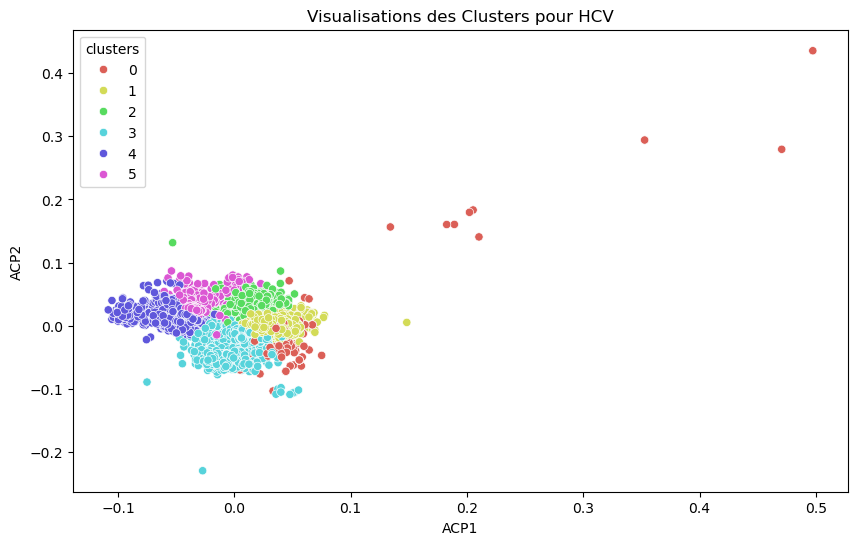

Silhouette score : 0.20364481685211036


In [18]:
X=np.array(df['embedding'].tolist())
n=6 # 6 clusters pour 6 Génotype
kmeans=KMeans(n_clusters=n, random_state=111)
df['clusters']=kmeans.fit_predict(X)

acp=PCA(n_components=3, random_state=111).fit_transform(X)
df['pca1']=acp[:, 0]
df['pca2']=acp[:, 1]
df['pca3']=acp[:, 2]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='clusters', palette=sns.color_palette('hls', n), legend='full')
plt.title('Visualisations des Clusters pour HCV')
plt.xlabel('ACP1')
plt.ylabel('ACP2')
plt.savefig('kmeans_hcv.png', format='png')
plt.show()

score_silhouette_wv=silhouette_score(X, kmeans.labels_)
print(f'Silhouette score : {score_silhouette_wv}')

# Suppression des données aberrantes  

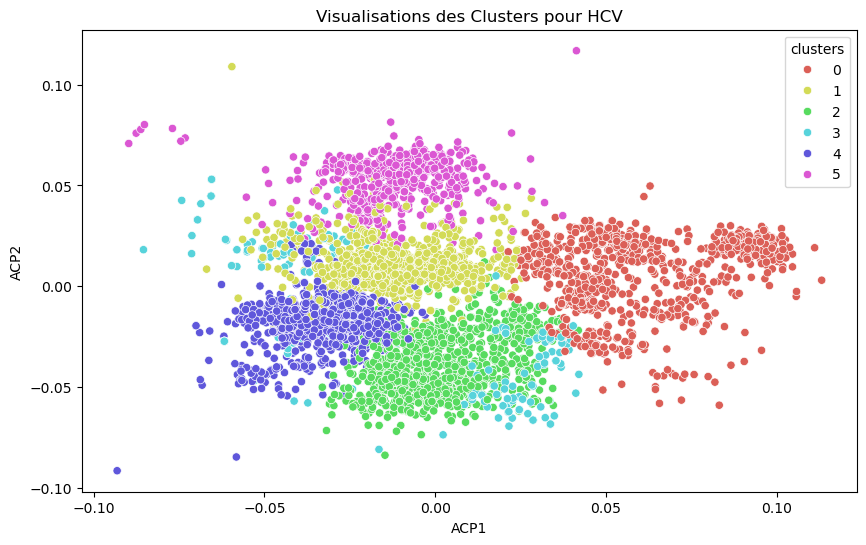

Silhouette score : 0.2206621063108767


In [19]:
# Extraction des données aberante
sequence_aberrante=['4h_CNR435', 'JC527410.1', 'MO302764.1', '4r_CNR413', '2i_CNR273.16' '6o_CNR429', '4o_CNR299.16', 'AX023102.1', 'L23468.1', '4a_CNR283.16', '4r_CNR336.16', '4r_CNR317.16', '4v_VER036']
df_aberrante=df[df['accession'].isin(sequence_aberrante)]
df = df[~df.index.isin(df_aberrante.index)]
X=np.array(df['embedding'].tolist())
n=6 # 6 clusters pour 6 Génotype
kmeans=KMeans(n_clusters=n, random_state=111)
df['clusters']=kmeans.fit_predict(X)

acp=PCA(n_components=3, random_state=111).fit_transform(X)
df['pca1']=acp[:, 0]
df['pca2']=acp[:, 1]
df['pca3']=acp[:, 2]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='clusters', palette=sns.color_palette('hls', n), legend='full')
plt.title('Visualisations des Clusters pour HCV')
plt.xlabel('ACP1')
plt.ylabel('ACP2')
plt.savefig('kmeans_hcv_presentation.png', format='png')
plt.show()

score_silhouette_wv=silhouette_score(X, kmeans.labels_)
print(f'Silhouette score : {score_silhouette_wv}')

Cluster 1 - Séquence la plus proche: AB523114.1 (Genotype : sous type 3)
Cluster 2 - Séquence la plus proche: AB661412.1 (Genotype : sous type 2)
Cluster 3 - Séquence la plus proche: GU054457.1 (Genotype : sous type 4)
Cluster 4 - Séquence la plus proche: LC831192.1 (Genotype : sous type 2)
Cluster 5 - Séquence la plus proche: FJ469192.1 (Genotype : sous type 6)
Cluster 6 - Séquence la plus proche: FN553049.1 (Genotype : sous type 5)


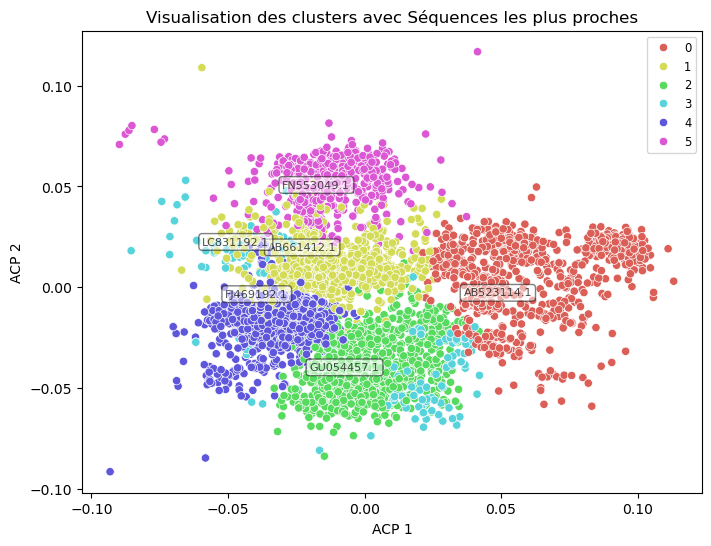

Silhouette Score : 0.2206621063108767


In [20]:
# Trouver les indices des points les plus proches des centroïdes
centroides = kmeans.cluster_centers_
indices_proches, _ = pairwise_distances_argmin_min(centroides, X)

# Obtenir les accessions les plus proches
accessions_proches = df['accession'].iloc[indices_proches]
genotypes_proches = df['genotype'].iloc[indices_proches]  # Assurez-vous que la colonne 'genotype' existe

# Affichage des résultats
for i, (accession, genotype) in enumerate(zip(accessions_proches, genotypes_proches)):
    print(f"Cluster {i+1} - Séquence la plus proche: {accession} (Genotype : {genotype})")

# Visualisation des clusters avec PCA
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(data=df, x='pca1', y='pca2', hue='clusters', palette=sns.color_palette("hls", n),
                          legend='full')

for cluster_idx, (accession, x, y) in enumerate(zip(df['accession'].iloc[indices_proches], df['pca1'].iloc[indices_proches], df['pca2'].iloc[indices_proches])):
    scatter.annotate(accession, (x, y), fontsize=8, alpha=0.7, textcoords="offset points",
                     xytext=(5, 5), ha='right', va='bottom', bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.5))

plt.title('Visualisation des clusters avec Séquences les plus proches')
plt.xlabel('ACP 1')
plt.ylabel('ACP 2')
plt.legend(fontsize='small')
plt.savefig('kmeans_hcv_accessions.png', format='png')
plt.show()

silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score : {silhouette_avg}")


In [22]:
# Sélection des lignes correspondant aux 12 accessions les plus proches des centroïdes
df_12_accessions = df[df['accession'].isin(accessions_proches)].copy()
# Suppression des doublons
colonnes_a_supprimer = ['kmers', 'unique_kmers', 'frequences', 'clusters', 'embedding', 'pca1', 'pca2', 'pca3']  # Exemple, ajustez selon vos besoins
# Suppression des colonnes spécifiées
embedding_df = pd.DataFrame(df['embedding'].tolist(), columns=[f'emb_{i+1}' for i in range(df_12_accessions['embedding'].iloc[0].shape[0])])
df_12_accessions = pd.concat([df_12_accessions, embedding_df], axis=1)
df_12_accessions.drop(columns=colonnes_a_supprimer, inplace=True)
df_12_accessions.dropna(inplace=True)

df_12_accessions.drop_duplicates(subset='accession', keep='first', inplace=True)
df_12_accessions.to_csv('df_12_accessions_SIV.csv', index=False)
df_12_accessions

,accession,sequence,genotype,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,...,emb_55,emb_56,emb_57,emb_58,emb_59,emb_60,emb_61,emb_62,emb_63,emb_64
26,AB661412.1,ATGAGCACAAATCCTAAACCTCAAAGAAAAACCAAAAGAAACACAA...,sous type 2,0.018302,-0.164399,0.054814,-0.191797,0.079642,-0.011087,-0.015446,...,-0.077169,0.055843,0.014494,-0.051618,0.061963,0.020320,0.018277,-0.094607,-0.032672,0.082841
289,LC831192.1,TCACAAACACCAATTCCTACAACCATCATGGCCAAAAATGAGGTGT...,sous type 2,0.020357,-0.181261,0.051817,-0.199047,0.073593,-0.015922,-0.000998,...,-0.078253,0.061904,0.016000,-0.053094,0.052912,0.016179,0.014378,-0.094539,-0.027138,0.071692
160,AB523114.1,GGAACCGGTGAGTACACCGGAATCGCCGGGCCGACCGGGTCCTTTC...,sous type 3,0.014256,-0.170040,0.059039,-0.206519,0.070803,-0.023184,-0.016684,...,-0.069977,0.050160,0.018776,-0.047058,0.058974,0.021288,0.032023,-0.081848,-0.025761,0.072158
754,GU054457.1,GAGGTCTATCAGTGCTGTGACCTAGAGCCCGAAGCCCGCAAGGTGA...,sous type 4,0.007642,-0.189121,0.058023,-0.207947,0.082849,-0.036999,-0.007637,...,-0.066971,0.046972,0.016889,-0.058242,0.055907,0.023018,0.053409,-0.073853,-0.007164,0.070444
161,FN553049.1,GTTCCCTACCGAAACAGCTCTGGGATTTATCATGTCACCAATGATT...,sous type 5,0.019435,-0.170843,0.049681,-0.206321,0.067207,-0.021480,-0.004982,...,-0.075851,0.055965,0.023187,-0.045416,0.057117,0.016980,0.016670,-0.089317,-0.032245,0.077916
150,FJ469192.1,ATTCCCACAACCATCATGGCTAAGAATGAAGTCTTCTGCGTAGATC...,sous type 6,0.018460,-0.171452,0.052274,-0.190530,0.080935,-0.004836,-0.009085,...,-0.077888,0.059212,0.012311,-0.050636,0.065877,0.022437,0.016876,-0.094273,-0.031453,0.078267


# Entrainement du modèle

/opt/anaconda3/envs/stage/lib/python3.10/site-packages/seaborn/categorical.py:1280: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sub_data


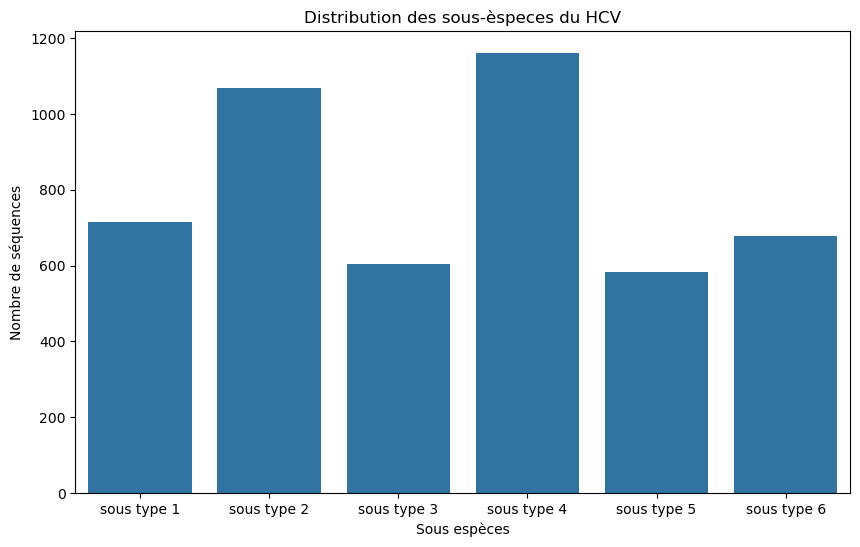

Il y a un désequilibre entres les génotypes


In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='genotype', fill=True)
plt.title('Distribution des sous-èspeces du HCV')
plt.xlabel('Sous espèces')
plt.ylabel('Nombre de séquences')
plt.savefig('boxplot_hcv.png', format='png')
plt.show()
print(f'Il y a un désequilibre entres les génotypes')

In [30]:
# Préparation des données
X=embedding_df
y=df['genotype']

label_encoder=LabelEncoder()
y_label=label_encoder.fit_transform(y)

# Séparation des données
X_train, X_test, y_train, y_test=train_test_split(X, y_label, test_size=0.3, stratify=y_label, random_state=42)
normal=StandardScaler()
X_train_normal=normal.fit_transform(X_train)
X_test_normal=normal.transform(X_test)

/opt/anaconda3/envs/stage/lib/python3.10/site-packages/seaborn/categorical.py:1280: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sub_data
/opt/anaconda3/envs/stage/lib/python3.10/site-packages/seaborn/categorical.py:1280: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sub_data


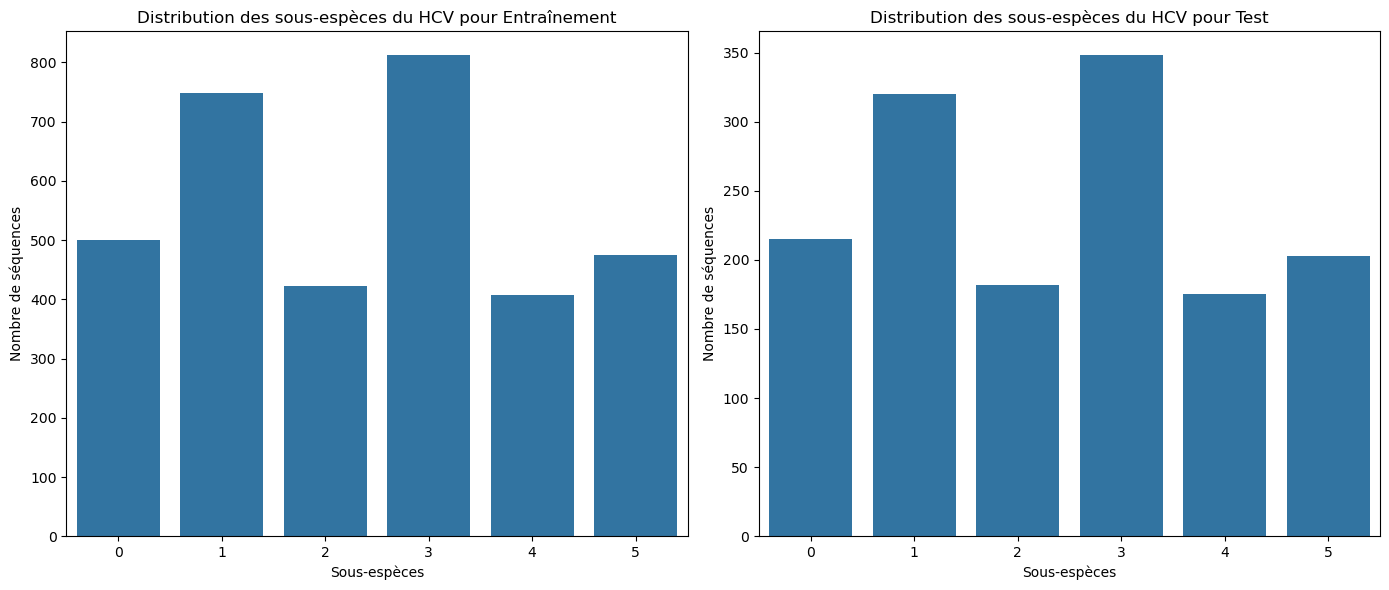

In [33]:
df_train=pd.DataFrame({'genotype' : y_train})
df_test=pd.DataFrame({'genotype' : y_test})

# Création des sous-graphiques
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Graphique pour l'ensemble d'entraînement
sns.countplot(data=df_train, x='genotype', ax=axs[0])
axs[0].set_title('Distribution des sous-espèces du HCV pour Entraînement')
axs[0].set_xlabel('Sous-espèces')
axs[0].set_ylabel('Nombre de séquences')

# Graphique pour l'ensemble de test
sns.countplot(data=df_test, x='genotype', ax=axs[1])
axs[1].set_title('Distribution des sous-espèces du HCV pour Test')
axs[1].set_xlabel('Sous-espèces')
axs[1].set_ylabel('Nombre de séquences')

# Ajustement de la mise en page
plt.tight_layout()

# Sauvegarde et affichage des graphiques
#plt.savefig('distribution_hcv.png', format='png')
plt.show()

In [36]:
# Suport Vecteur Machine
modele_SVM=svm.SVC(kernel="linear", decision_function_shape='ovr')
modele_SVM.fit(X_train_normal, y_train)
#Prédictions
y_SVM=modele_SVM.predict(X_test_normal)
precision_SVM=accuracy_score(y_test, y_SVM)
rapport_classification_SVM=classification_report(y_test, y_SVM, target_names=label_encoder.classes_)
matrice_SVM=confusion_matrix(y_test, y_SVM)

print(f'Précision du modèle SVM : {precision_SVM}')
print(f'Rapport de Classification : \n {rapport_classification_SVM}')

Précision du modèle SVM : 0.8967428967428968
Rapport de Classification : 
               precision    recall  f1-score   support

 sous type 1       0.84      0.94      0.89       215
 sous type 2       0.86      0.91      0.88       320
 sous type 3       0.89      0.80      0.84       182
 sous type 4       0.93      0.86      0.89       348
 sous type 5       0.96      0.95      0.96       175
 sous type 6       0.92      0.93      0.93       203

    accuracy                           0.90      1443
   macro avg       0.90      0.90      0.90      1443
weighted avg       0.90      0.90      0.90      1443



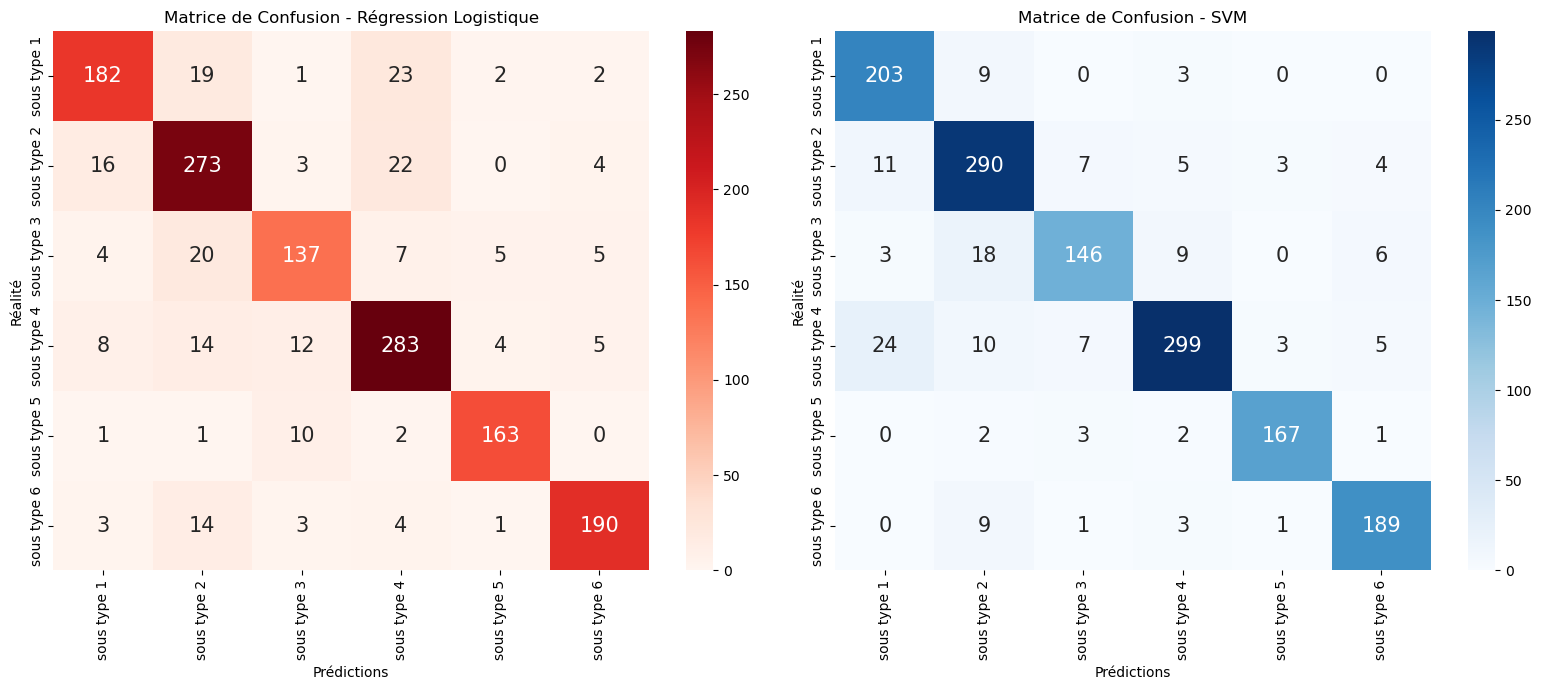

In [53]:
# Créer une figure avec 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 7))

# Matrice de confusion - Random Forest
sns.heatmap(matrice_LR, annot=True, fmt='d', cmap='Reds', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, ax=ax[0], annot_kws={"size": 15})
ax[0].set_title('Matrice de Confusion - Régression Logistique')
ax[0].set_xlabel('Prédictions')
ax[0].set_ylabel('Réalité')

# Matrice de confusion - KNN
sns.heatmap(matrice_SVM, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, ax=ax[1], annot_kws={"size": 15})
ax[1].set_title('Matrice de Confusion - SVM')
ax[1].set_xlabel('Prédictions')
ax[1].set_ylabel('Réalité')

# Ajuster les espacements
plt.tight_layout()

# Sauvegarder la figure
plt.savefig('confusion_svm_lr.png', format='png')

# Afficher la figure
plt.show()

# Validation croisée

In [109]:
def validation_croise(model, X, y, cv_folds=5):
    # Exécuter la validation croisée
    scores = cross_val_score(model, X, y, cv=cv_folds, scoring='accuracy')
    
    # Calculer la précision moyenne et l'écart-type
    mean_accuracy = np.mean(scores)
    std_accuracy = np.std(scores)

    # Afficher les résultats
    print(f'Modèle: {model.__class__.__name__}')
    print(f'Précision moyenne: {mean_accuracy:.4f}')
    print(f'Écart-type de la précision: {std_accuracy:.4f}')
    print('Scores pour chaque plis:', scores)
    print()

validation_croise(modele_LR, X_train_normal, y_train)

validation_croise(modele_SVM, X_train_normal, y_train)

validation_croise(modele_RF, X_train_normal, y_train)


validation_croise(modele_KNN, X_train_normal, y_train)


/opt/anaconda3/envs/stage/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/stage/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/stage/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/stage/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: Futur

Modèle: LogisticRegression
Précision moyenne: 0.8450
Écart-type de la précision: 0.0099
Scores pour chaque plis: [0.83382789 0.84124629 0.8410104  0.84546805 0.86329866]

Modèle: SVC
Précision moyenne: 0.8797
Écart-type de la précision: 0.0082
Scores pour chaque plis: [0.8694362  0.87240356 0.88558692 0.87964339 0.89153046]

Modèle: RandomForestClassifier
Précision moyenne: 0.9430
Écart-type de la précision: 0.0082
Scores pour chaque plis: [0.93026706 0.9421365  0.94650817 0.95542348 0.94056464]

Modèle: KNeighborsClassifier
Précision moyenne: 0.9641
Écart-type de la précision: 0.0065
Scores pour chaque plis: [0.95548961 0.96884273 0.96879643 0.97028232 0.95690936]



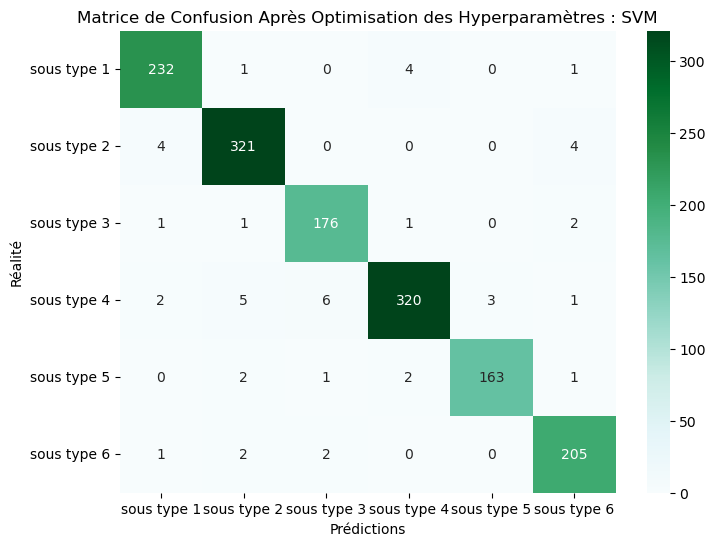

In [131]:
plt.figure(figsize=(8, 6))
sns.heatmap(matrice, annot=True, fmt='d', cmap='BuGn', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Matrice de Confusion Après Optimisation des Hyperparamètres : SVM')
plt.xlabel('Prédictions')
plt.ylabel('Réalité')
plt.savefig('svm3_confusion.png', format='png')
plt.show()